In [56]:

from wid_tools import WIDDoughMaker
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime,timedelta,date
%matplotlib inline


# Goals:
 - Investigate what whiskey asset classes malt/grain/first-fill/refill/etc, distilleries, and ages of product are most ripe for investment and probable gain
 
# Tools:
The WIDDoughMaker fetches assets (aka pitches) and their respective price histories. Afterwards, exploratory data analysis via python

# Sample price chart
[Click me](https://www.whiskyinvestdirect.com/tullibardine/2015/Q4/BBF/chart.do)

In [2]:
p = WIDDoughMaker()
p.setUp()

# log in might not be necessary to fetch chart data, only to make bids
#p.login()
p.get_pitches()


Num of pitches:96


In [ ]:
p.pitches().head()


,barrelTypeCode,bondQuarter,bondYear,categoryName,considerationCurrency,distillery,securityId
0,HHR,Q4,2017,GRAIN,GBP,cameronbridge,SPIRIT000207
2,HHR,Q3,2017,GRAIN,GBP,cameronbridge,SPIRIT000196
4,HHR,Q4,2016,GRAIN,GBP,cameronbridge,SPIRIT000174
6,HHR,Q3,2015,GRAIN,GBP,cameronbridge,SPIRIT000156
8,HHR,Q4,2014,GRAIN,GBP,cameronbridge,SPIRIT000119


In [ ]:
chart_df = pd.DataFrame()
failed_records = []

for r in p.pitches().iterrows():
    try:
        chart_df = pd.concat([p.get_chart_data(r[1].to_dict()),chart_df])
    except:
        failed_records.append(r[1].to_dict())

chart_df.head()


In [ ]:
chart_df.to_csv('pitch_history_3_19_2018.csv',index=False)

In [2]:
cask_types = pd.read_csv('cask_types.csv')
chart_df = pd.read_csv('pitch_history_3_18_2018.csv')

chart_df['bondQuarter'] = chart_df['bondQuarter'].apply(lambda x: int(x[1]))
chart_df['yrqtr'] = chart_df.apply(lambda x: int(x['bondYear'])*10+int(x['bondQuarter']),axis=1)
chart_df['label'] = chart_df.apply(lambda x: "{}_{}_{}".format(*[x['distillery'],x['barrelTypeCode'],x['yrqtr']]) ,axis=1)
chart_df['dealDate'] = pd.to_datetime(chart_df['dealDate'])
chart_df = chart_df.merge(cask_types,on='barrelTypeCode')
chart_df.head()

,day,dealDate,priceAvg,dummy,barrelTypeCode,bondQuarter,bondYear,categoryName,considerationCurrency,distillery,securityId,yrqtr,label,barrelType
0,65,2016-01-18,3.92,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill
1,66,2016-01-19,3.90,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill
2,67,2016-01-20,3.90,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill
3,68,2016-01-21,3.91,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill
4,69,2016-01-22,3.91,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill


In [3]:
chart_df_first_date = chart_df.sort_values('dealDate').groupby(['securityId']).agg({'dealDate':'min'}).reset_index()

chart_df_first_rate = chart_df_first_date.merge(chart_df[['securityId','dealDate','priceAvg']],on=['securityId','dealDate'])

chart_df_norm = chart_df.merge(chart_df_first_rate,on=['securityId'],suffixes=('','_first'))
chart_df_norm['norm_price'] = chart_df_norm['priceAvg']/chart_df_norm['priceAvg_first']

chart_df_norm.head()

,day,dealDate,priceAvg,dummy,barrelTypeCode,bondQuarter,bondYear,categoryName,considerationCurrency,distillery,securityId,yrqtr,label,barrelType,dealDate_first,priceAvg_first,norm_price
0,65,2016-01-18,3.92,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,1.000000
1,66,2016-01-19,3.90,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,0.994898
2,67,2016-01-20,3.90,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,0.994898
3,68,2016-01-21,3.91,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,0.997449
4,69,2016-01-22,3.91,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,0.997449


In [44]:
recent_vintages = chart_df_norm[chart_df_norm['yrqtr'] > 20153]

recent_vintages.head()

,day,dealDate,priceAvg,dummy,barrelTypeCode,bondQuarter,bondYear,categoryName,considerationCurrency,distillery,securityId,yrqtr,label,barrelType,dealDate_first,priceAvg_first,norm_price
0,65,2016-01-18,3.92,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,1.000000
1,66,2016-01-19,3.90,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,0.994898
2,67,2016-01-20,3.90,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,0.994898
3,68,2016-01-21,3.91,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,0.997449
4,69,2016-01-22,3.91,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,0.997449


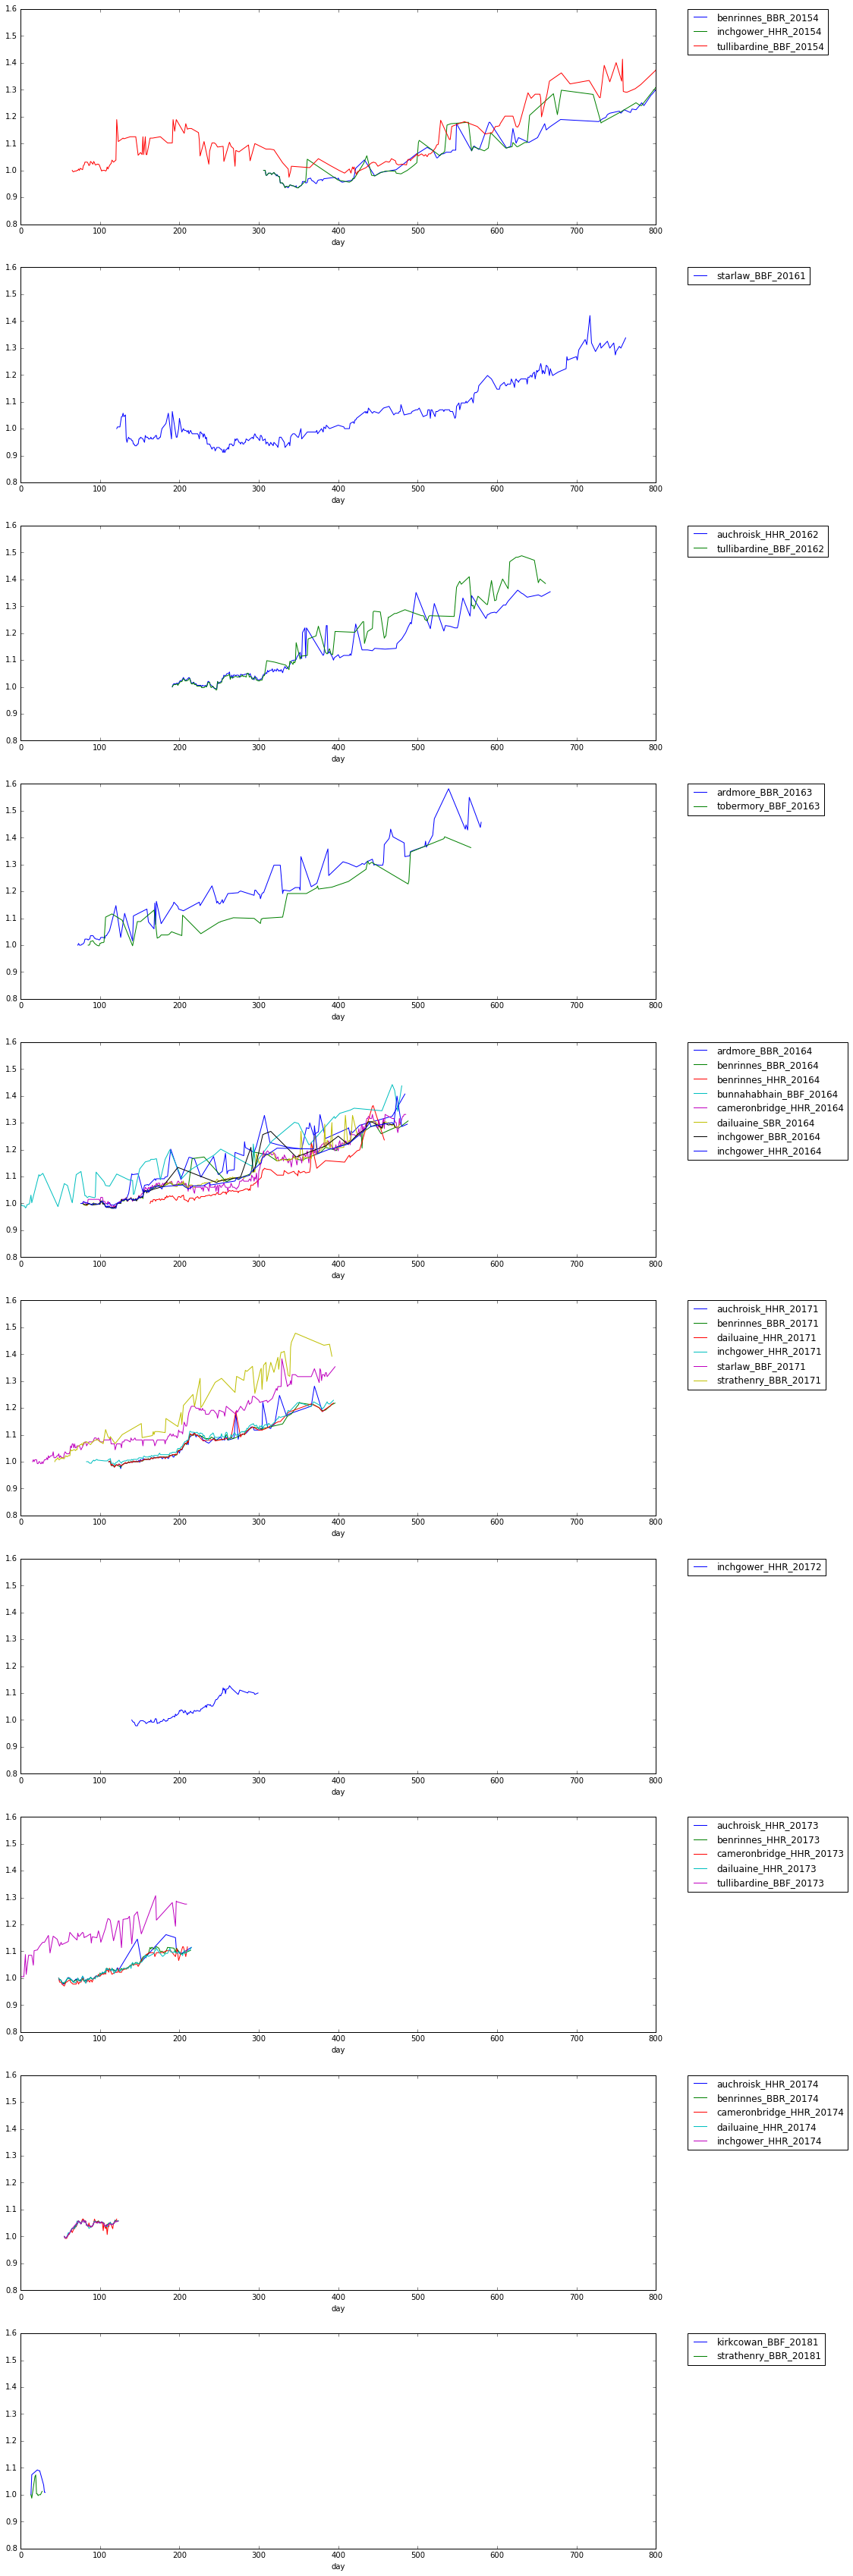

In [71]:
vintage_grouping = recent_vintages.groupby('yrqtr')

fig, ax = plt.subplots(len(vintage_grouping),figsize=(15,60))

plot_counter = 0
for yrqtr_label, yrqtr_grp in vintage_grouping:
    for spirit_label, spirit_grp in yrqtr_grp.groupby('label'):
        spirit_grp.plot(x = 'day', y = 'norm_price',ax = ax[plot_counter], label = spirit_label)
        ax[plot_counter].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        ax[plot_counter].set_xlim(0,800)
        ax[plot_counter].set_ylim(.8,1.6)
    plot_counter += 1
plt.show()

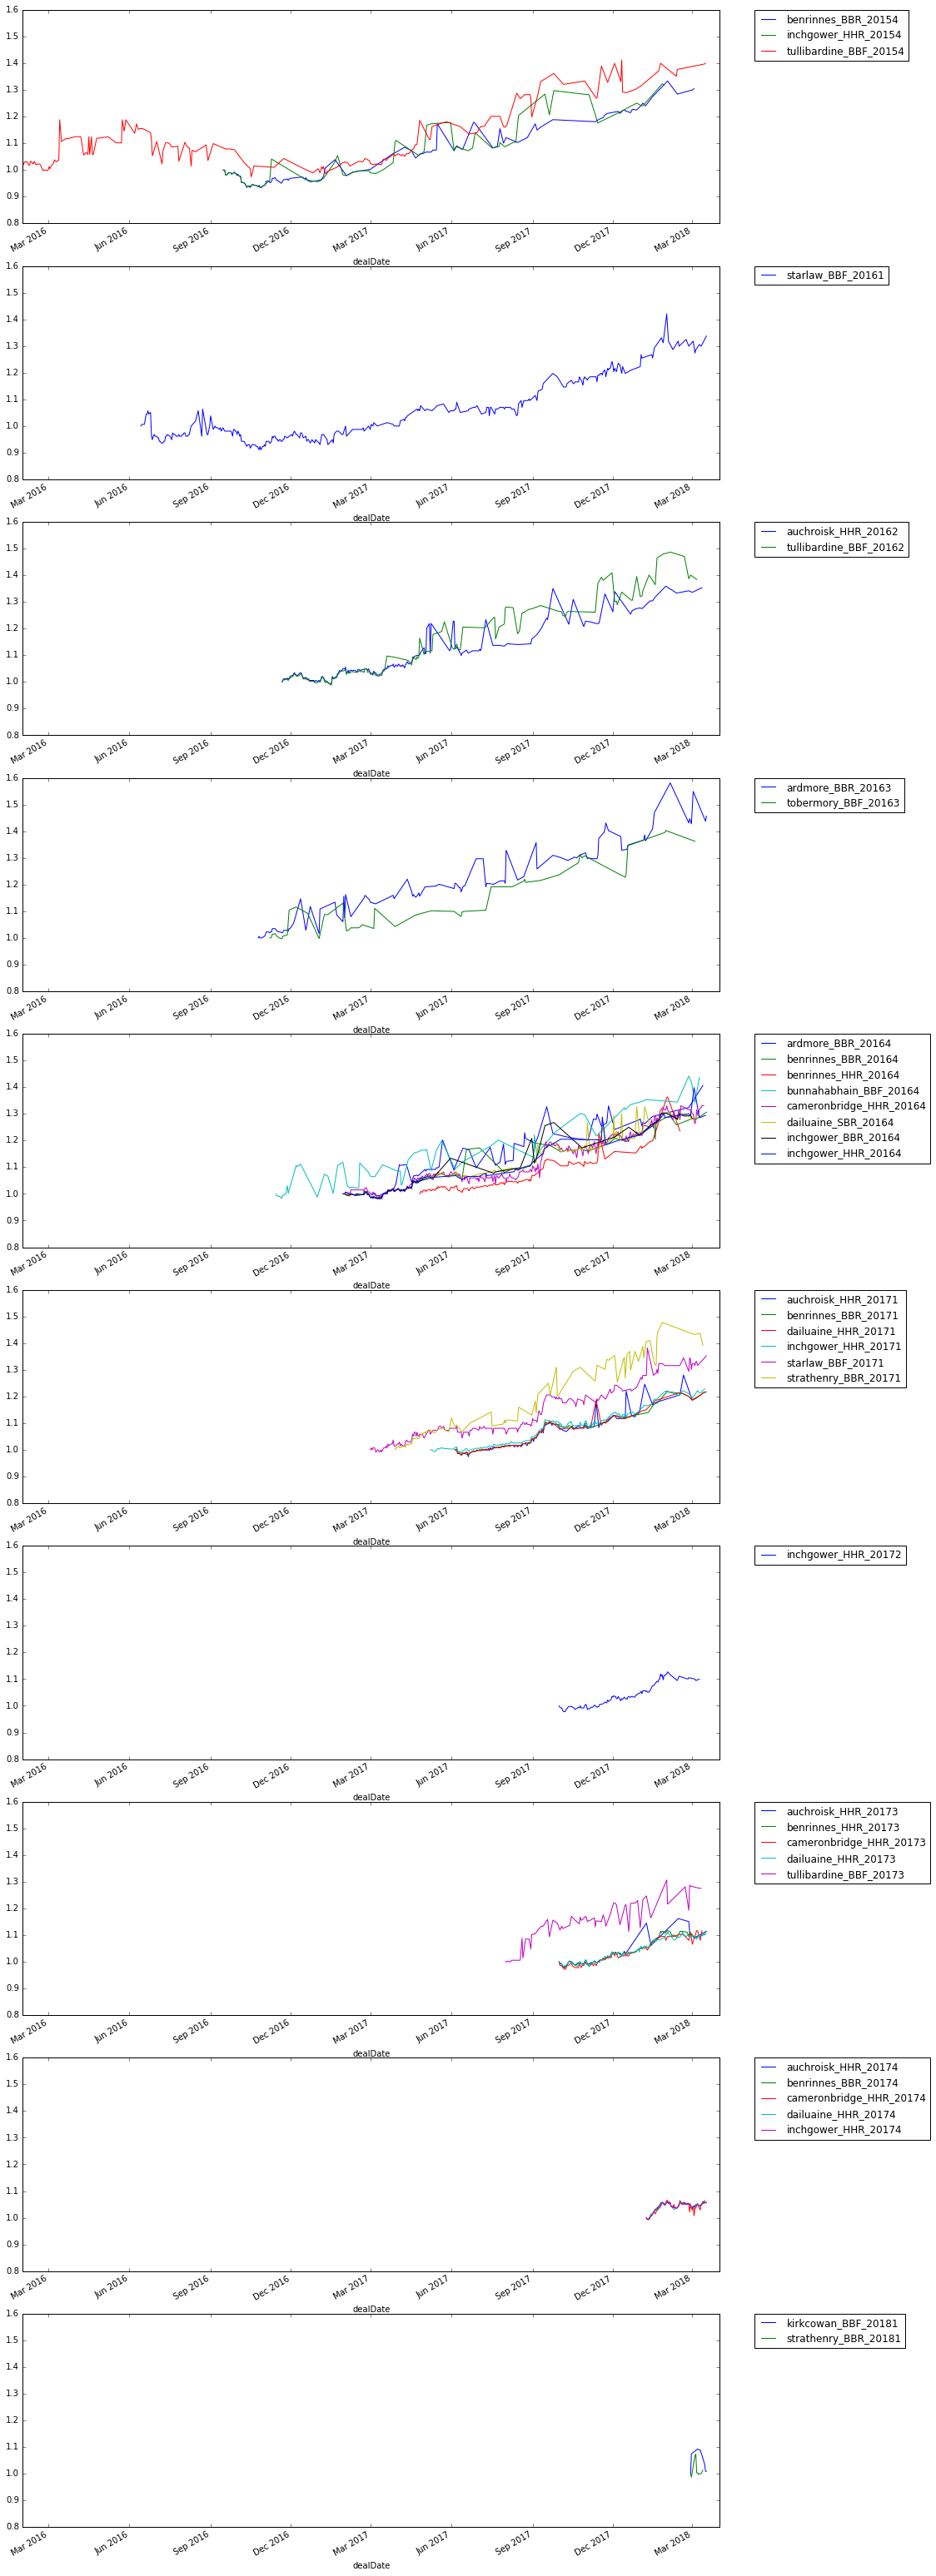

In [73]:
vintage_grouping = recent_vintages.groupby('yrqtr')

fig, ax = plt.subplots(len(vintage_grouping),figsize=(15,60))

plot_counter = 0
for yrqtr_label, yrqtr_grp in vintage_grouping:
    for spirit_label, spirit_grp in yrqtr_grp.groupby('label'):
        spirit_grp.plot(x = 'dealDate', y = 'norm_price',ax = ax[plot_counter], label = spirit_label)
        ax[plot_counter].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        ax[plot_counter].set_xlim(date(2016,2,1),date(2018,4,1))
        ax[plot_counter].set_ylim(.8,1.6)
    plot_counter += 1
plt.show()

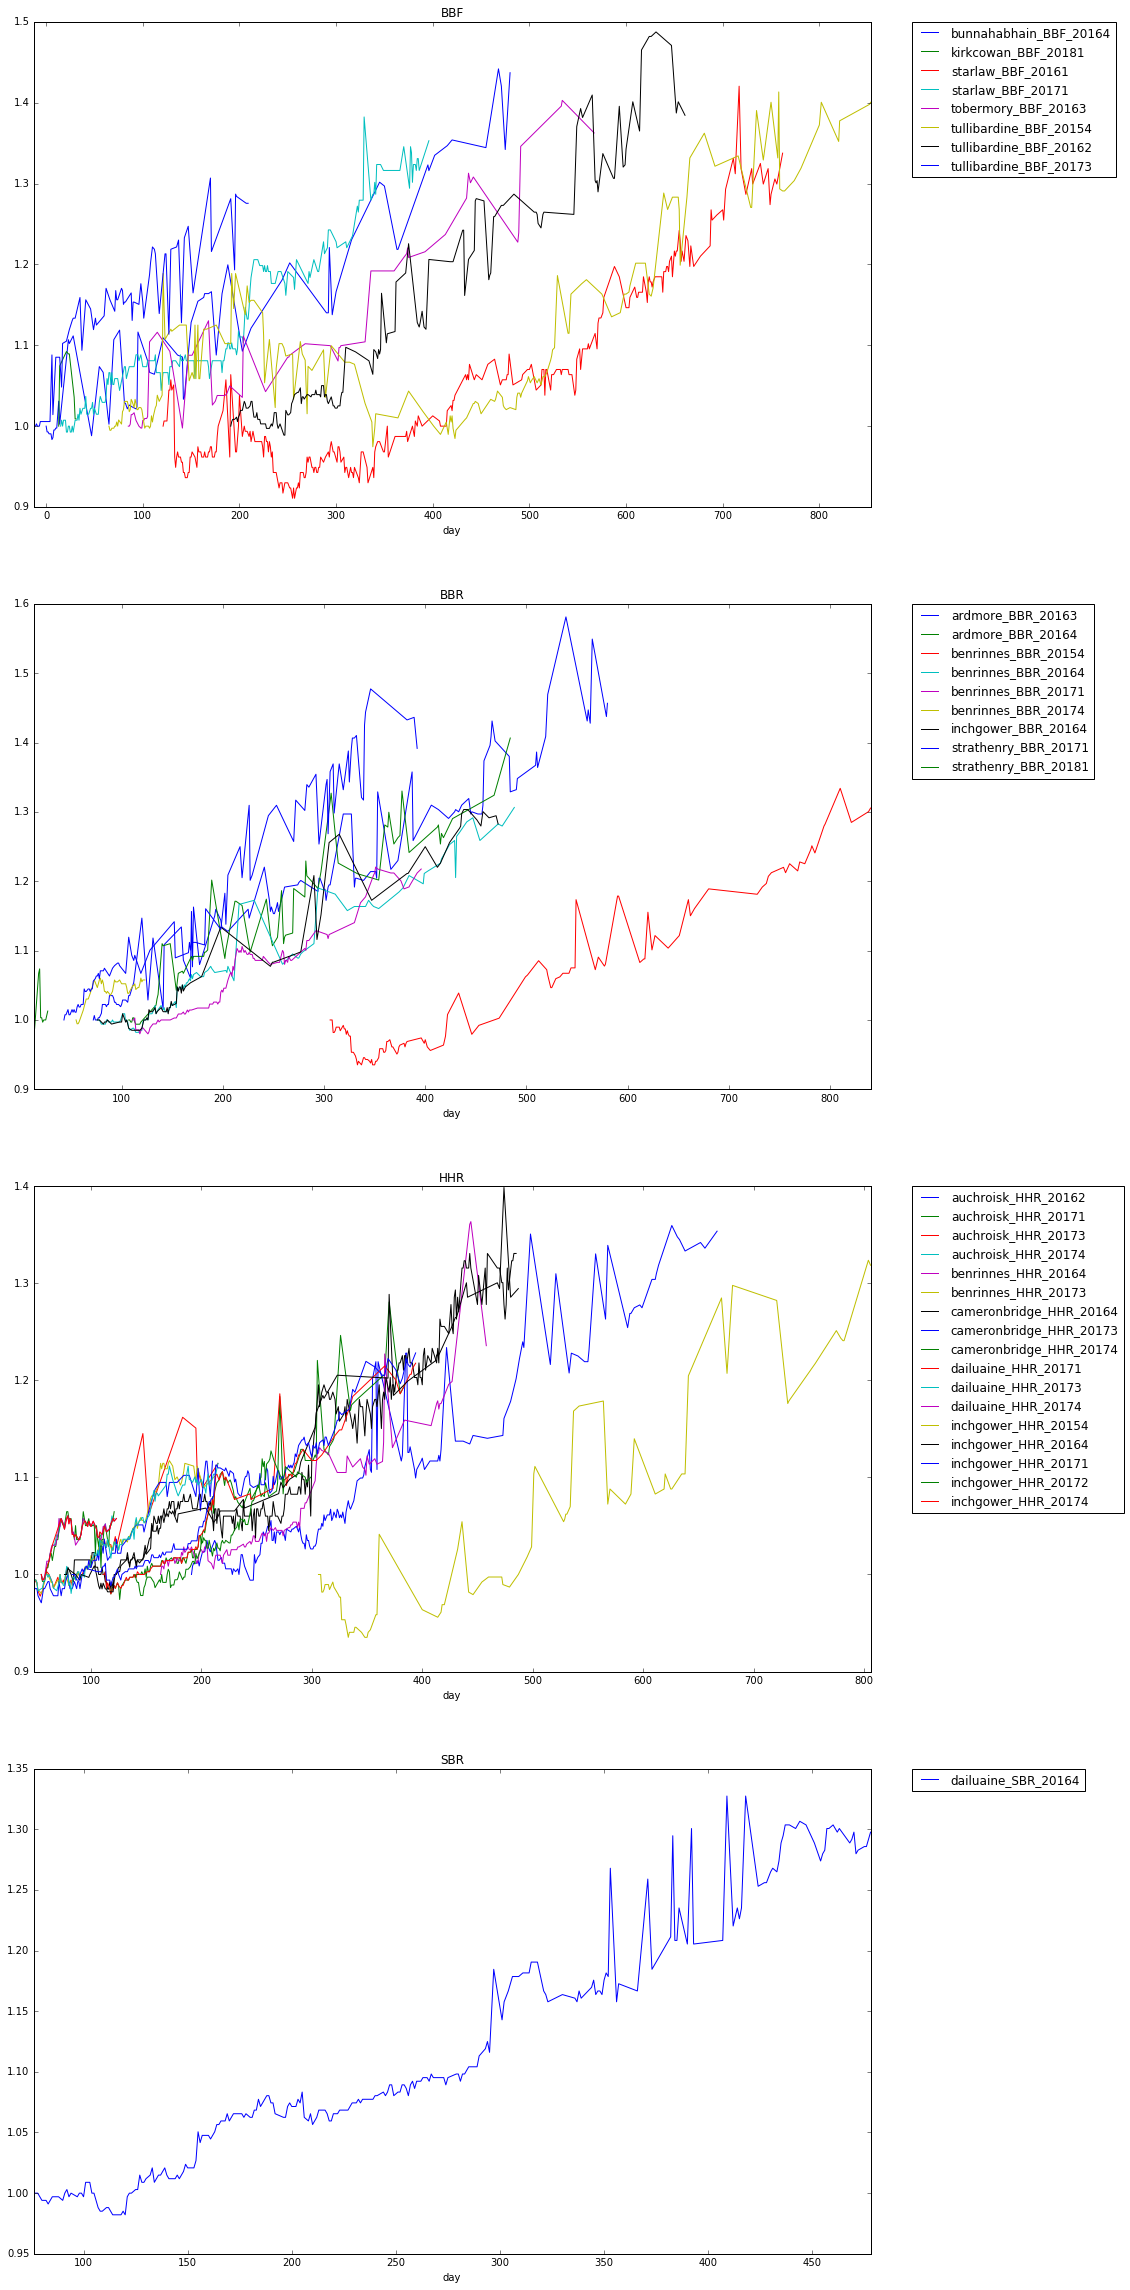

In [46]:
barrel_grouping = recent_vintages.groupby('barrelTypeCode')

fig, ax = plt.subplots(len(barrel_grouping),figsize=(15,40))

plot_counter = 0
for bt_label, bt_grp in barrel_grouping:
    ax[plot_counter].set_title(bt_label)
    for spirit_label, spirit_grp in bt_grp.groupby('label'):
        spirit_grp.plot(x = 'day', y = 'norm_price',ax = ax[plot_counter], label = spirit_label)
        ax[plot_counter].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plot_counter += 1
plt.show()

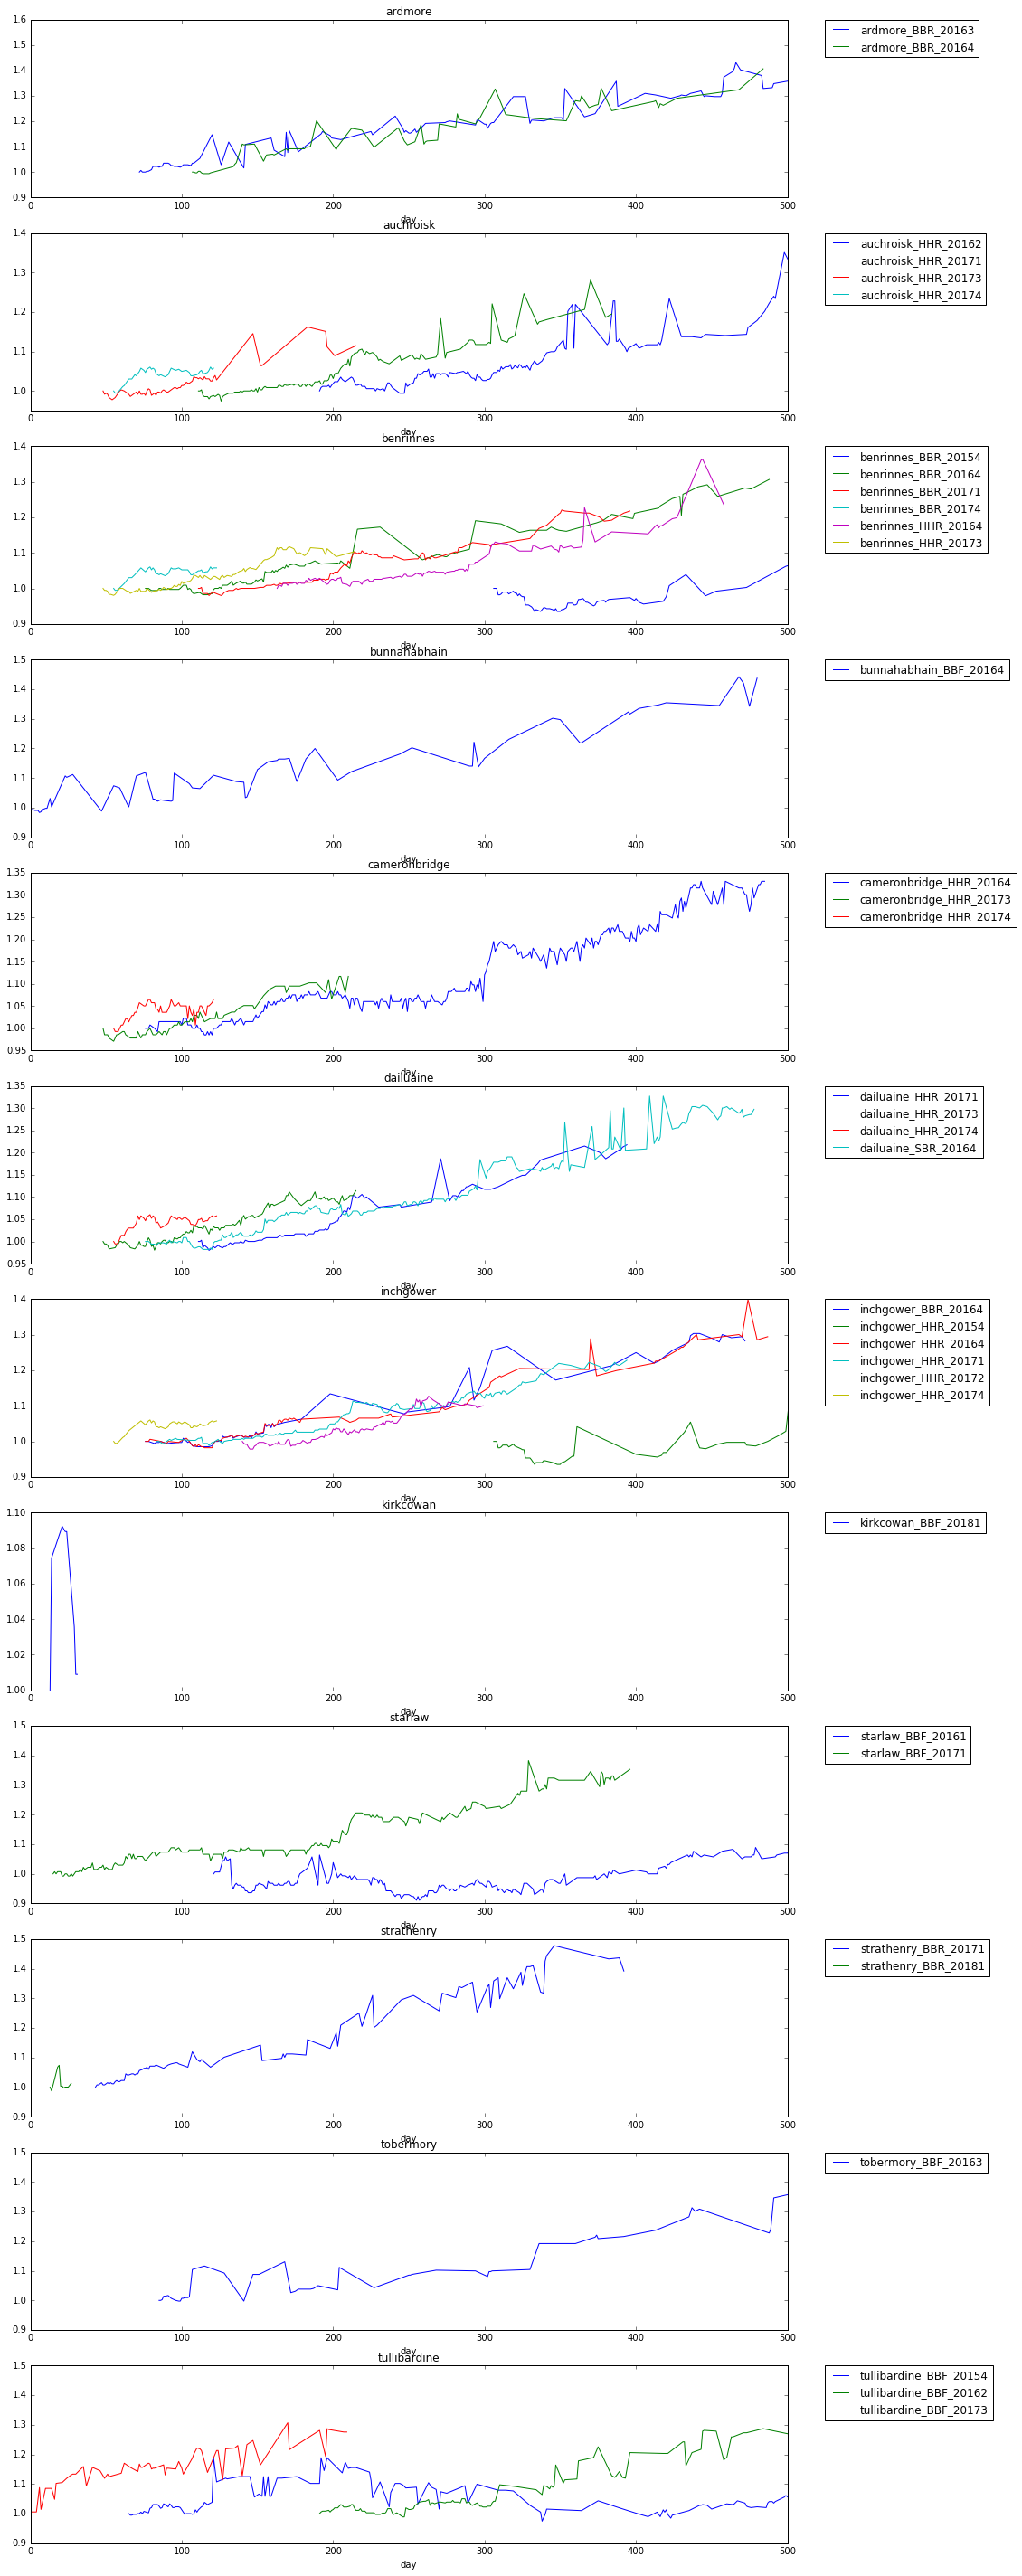

In [49]:
distillery_grouping = recent_vintages.groupby('distillery')

fig, ax = plt.subplots(len(distillery_grouping),figsize=(15,50))

plot_counter = 0
for dist_label, dist_grp in distillery_grouping:
    ax[plot_counter].set_title(dist_label)
    for spirit_label, spirit_grp in dist_grp.groupby('label'):
        spirit_grp.plot(x = 'day', y = 'norm_price',ax = ax[plot_counter], label = spirit_label)
        ax[plot_counter].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        ax[plot_counter].set_xlim(0,500)
    plot_counter += 1
plt.show()

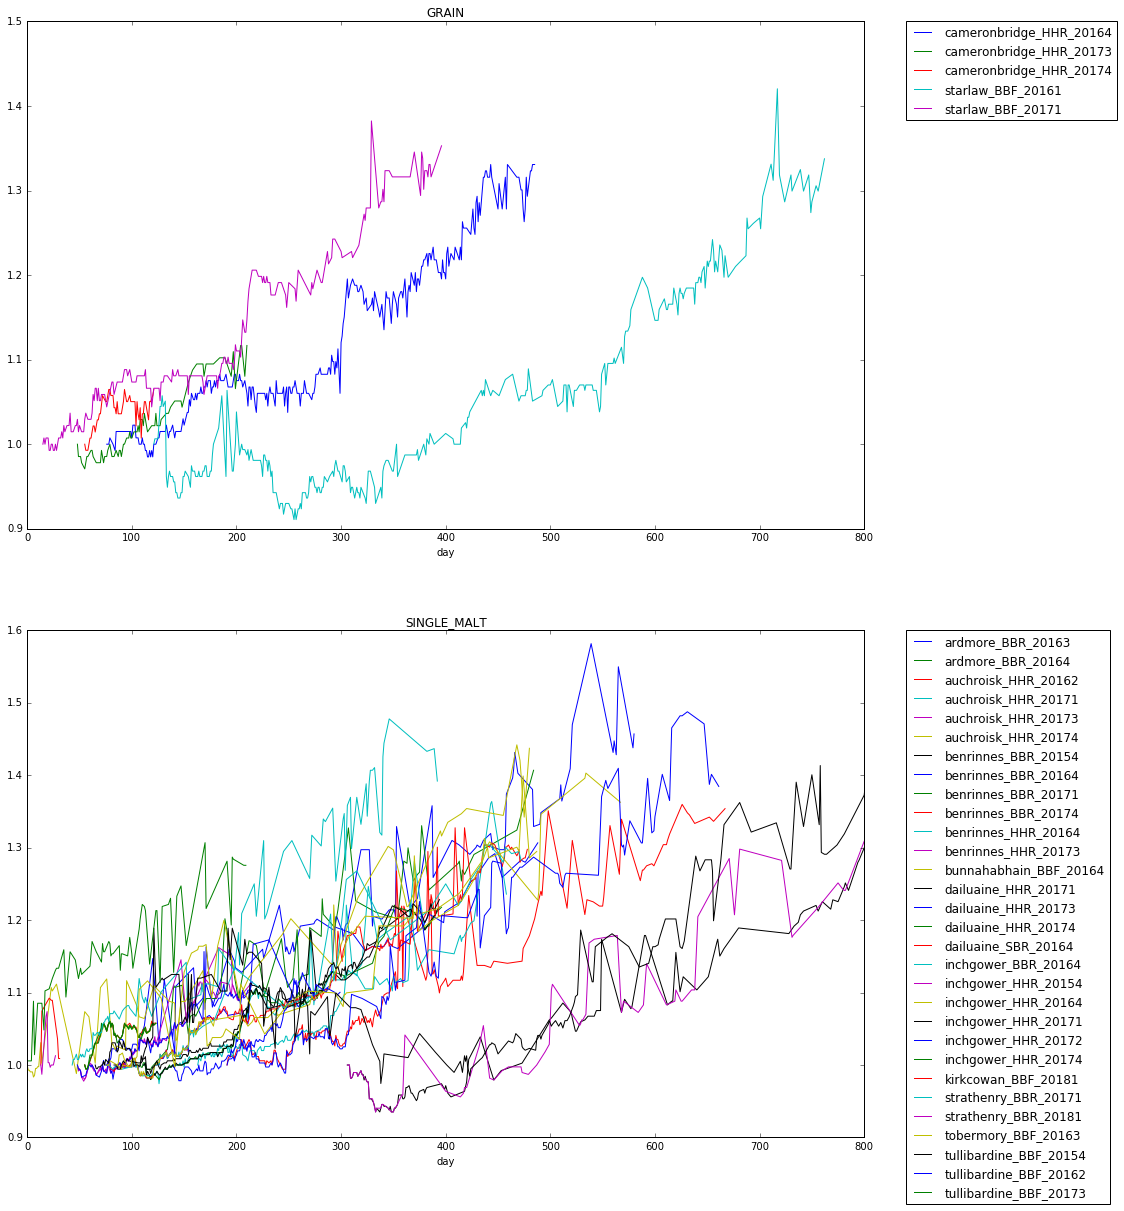

In [67]:
cat_grouping = recent_vintages.groupby('categoryName')

fig, ax = plt.subplots(len(cat_grouping),figsize=(15,20))

plot_counter = 0
for cat_label, cat_grp in cat_grouping:
    ax[plot_counter].set_title(cat_label)
    for spirit_label, spirit_grp in cat_grp.groupby('label'):
        spirit_grp.plot(x = 'day', y = 'norm_price',ax = ax[plot_counter], label = spirit_label)
        ax[plot_counter].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        ax[plot_counter].set_xlim(0,800)
    plot_counter += 1
plt.show()

# Note: 
From the charts grouping by category, I noticed similar magnitude spikes in two of the grain whiskeys about 100 days apart. Since these two in particular differ in age by 1 quarter I suspected that the spikes occured on the same calendar dates. Verified below.

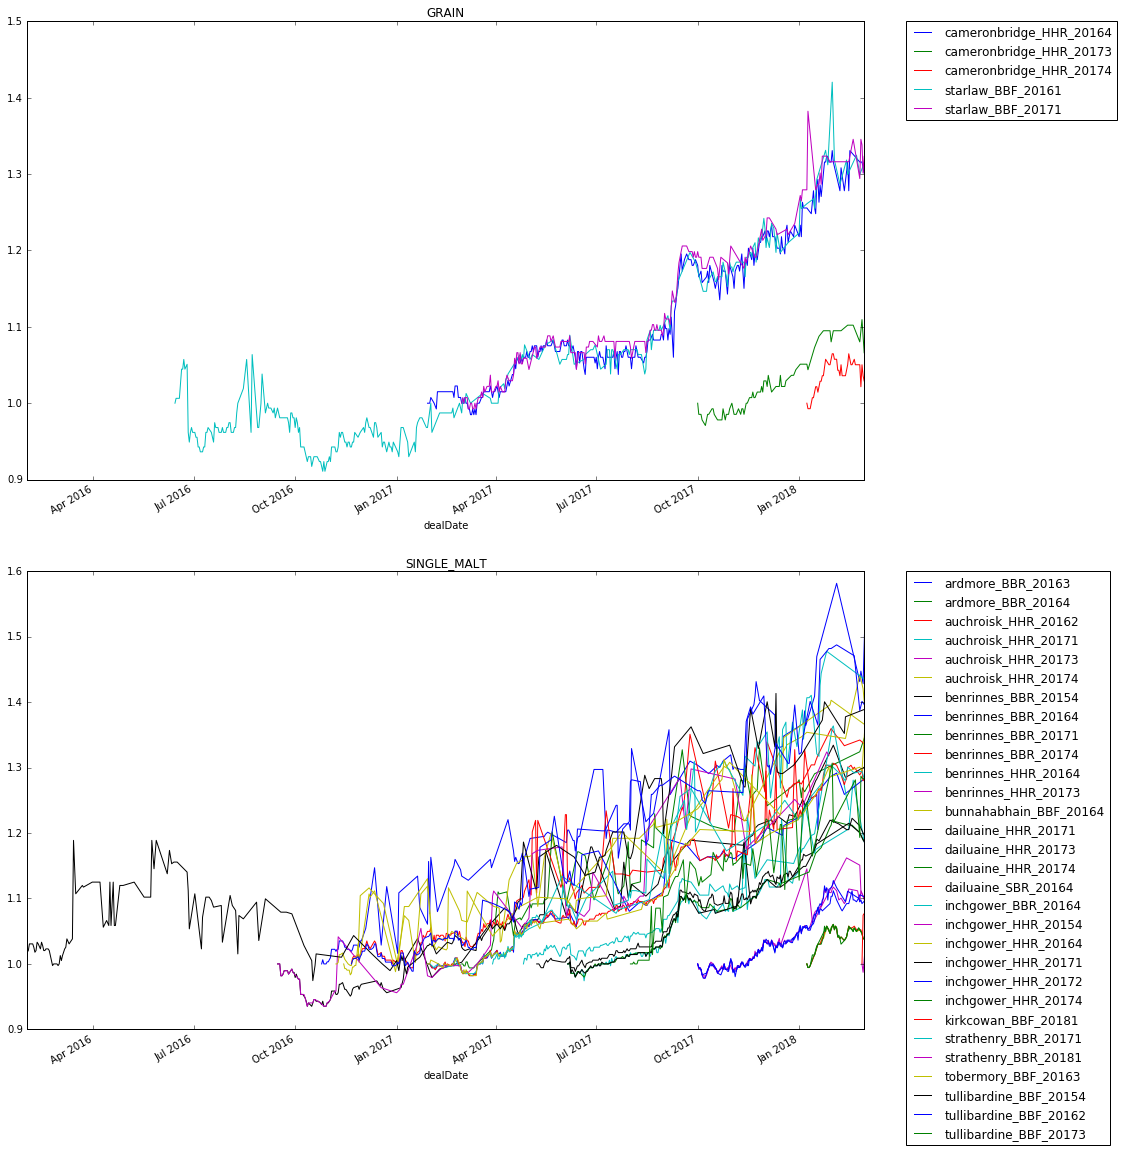

In [61]:
cat_grouping = recent_vintages.groupby('categoryName')

fig, ax = plt.subplots(len(cat_grouping),figsize=(15,20))

plot_counter = 0
for cat_label, cat_grp in cat_grouping:
    ax[plot_counter].set_title(cat_label)
    for spirit_label, spirit_grp in cat_grp.groupby('label'):
        spirit_grp.plot(x = 'dealDate', y = 'norm_price',ax = ax[plot_counter], label = spirit_label)
        ax[plot_counter].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        ax[plot_counter].set_xlim(date(2016,2,1),date(2018,3,1))
    plot_counter += 1
plt.show()

# Note: 
Confirmed, the movement in grains is nearly identical across the whole category. When you look at the price for single malt, it's evident that all products on the site move nearly in unison. 

# Next steps:

It's clear that there are general market movements that drive up the price of all products on the site. Want to divide out from each product the movement of the market as a whole to see whether any consistently perform above market.
To measure movement of the market without diluting the market index with the inclusion of new products, generate a series which is the avg day over day % increase (or maybe $ increase)? For products with no trades on that day, day over day % increase == np nan instead of 0.0 since I don't want the zeros of inactive products to dilute. Once we divide out the market movement from the individual products it might be clearer which outperform the market, is there a true breakout period for young products, etc.. Can we adapt the concept of beta from stocks to this?